In [1]:
from copy import deepcopy

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F

import cheetah
from tests.resources import ARESlatticeStage3v1_9 as ares_ocelot

math_op.py: module Numba is not installed. Install it if you want speed up correlation calculations


[INFO    ] : : beam.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] : : : : : : : : high_order.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.
[INFO    ] csr.py: module NUMEXPR is not installed. Install it to speed up calculation
[INFO    ] wake3D.py: module NUMBA is not installed. Install it to speed up calculation


initializing ocelot...
import: module NUMBA is not installed. Install it to speed up calculation
import: module PYFFTW is not installed. Install it to speed up calculation
import: module NUMEXPR is not installed. Install it to speed up calculation


In [2]:
quadrupole = cheetah.Quadrupole(length=torch.tensor(0.2), k1=torch.tensor(4.2))
quadrupole

Quadrupole(length=tensor(0.2000), k1=tensor(4.2000), misalignment=tensor([0., 0.]), tilt=tensor(0.), name=None, device="'cpu'")

In [3]:
quadrupole.k1

tensor(4.2000)

In [4]:
list(quadrupole.parameters())

[]

In [5]:
quadrupole.k1 = nn.Parameter(torch.tensor(5.0))
quadrupole

Quadrupole(length=tensor(0.2000), k1=Parameter containing:
tensor(5., requires_grad=True), misalignment=tensor([0., 0.]), tilt=tensor(0.), name=None, device="'cpu'")

In [6]:
list(quadrupole.parameters())

[Parameter containing:
 tensor(5., requires_grad=True)]

In [7]:
segment = cheetah.Segment(elements=[quadrupole])
segment

Segment(elements=ModuleList(
  (0): Quadrupole(length=tensor(0.2000), k1=Parameter containing:
  tensor(5., requires_grad=True), misalignment=tensor([0., 0.]), tilt=tensor(0.), name=None, device="'cpu'")
), name='unnamed', device='cpu')

In [8]:
list(segment.parameters())

[Parameter containing:
 tensor(5., requires_grad=True)]

In [9]:
type(segment.elements[0].k1)

torch.nn.parameter.Parameter

In [10]:
class TestModule(nn.Module):
    """Test"""

    def __init__(self, k1: torch.Tensor = torch.tensor(0.0)) -> None:
        super().__init__()

        self.k1 = k1


test_module = TestModule(k1=torch.tensor(4.2))
list(test_module.parameters())

[]

In [11]:
test_module.k1 = nn.Parameter(torch.tensor(3.14))
list(test_module.parameters())

[Parameter containing:
 tensor(3.1400, requires_grad=True)]

In [12]:
s = "hello"
print(s)
print(repr(s))

hello
'hello'


In [13]:
segment = cheetah.Segment(
    [
        cheetah.Drift(length=torch.tensor(1.0)),
        cheetah.Quadrupole(
            length=torch.tensor(0.2),
            k1=nn.Parameter(torch.tensor(3.142)),
            name="my_quad",
        ),
        cheetah.Drift(length=torch.tensor(1.0)),
    ]
)
incoming_beam = cheetah.ParticleBeam.from_astra(
    "benchmark/astra/ACHIP_EA1_2021.1351.001"
)

outgoing_beam = segment.track(incoming_beam)

In [14]:
outgoing_beam

ParticleBeam(n=100000, mu_x=tensor(3.5298e-07, grad_fn=<MeanBackward0>), mu_xp=tensor(-4.8779e-07, grad_fn=<MeanBackward0>), mu_y=tensor(-3.2951e-06, grad_fn=<MeanBackward0>), mu_yp=tensor(-1.3088e-06, grad_fn=<MeanBackward0>), sigma_x=tensor(6.1099e-05, grad_fn=<StdBackward0>), sigma_xp=tensor(0.0001, grad_fn=<StdBackward0>), sigma_y=tensor(0.0003, grad_fn=<StdBackward0>), sigma_yp=tensor(0.0001, grad_fn=<StdBackward0>), sigma_s=tensor(8.0274e-06, grad_fn=<StdBackward0>), sigma_p=tensor(0.0023, grad_fn=<StdBackward0>), energy=tensor(1.0732e+08, dtype=torch.float64))

In [15]:
outgoing_beam.particles

tensor([[ 2.5138e-08, -2.9385e-08, -9.6960e-07,  ...,  9.0621e-21,
          2.2205e-16,  1.0000e+00],
        [ 2.0749e-05, -3.7642e-05, -9.7300e-07,  ...,  2.1451e-06,
         -1.0257e-03,  1.0000e+00],
        [ 1.6727e-08, -1.2108e-08,  7.5594e-05,  ...,  7.3348e-07,
          1.1856e-03,  1.0000e+00],
        ...,
        [ 7.5297e-05, -1.2659e-04,  3.6216e-04,  ...,  8.0915e-07,
         -5.4731e-04,  1.0000e+00],
        [ 1.9986e-05, -3.4357e-05,  4.9716e-04,  ...,  1.2477e-06,
          1.4368e-03,  1.0000e+00],
        [-2.3671e-05,  3.7790e-05,  3.8850e-04,  ...,  6.5052e-06,
         -1.8158e-03,  1.0000e+00]], grad_fn=<MmBackward0>)

In [16]:
outgoing_beam.mu_x

tensor(3.5298e-07, grad_fn=<MeanBackward0>)

In [17]:
segment.elements[1].k1

Parameter containing:
tensor(3.1420, requires_grad=True)

In [18]:
segment.elements[1].transfer_map(energy=6e6)

tensor([[ 0.9378,  0.1958,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.6153,  0.9378,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0635,  0.2042,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.6416,  1.0635,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  1.0000, -0.0015,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000]],
       grad_fn=<CopySlices>)

In [19]:
segment.elements[1].k1 * 5

tensor(15.7100, grad_fn=<MulBackward0>)

In [20]:
torch.tensor([1.0, segment.elements[1].k1, 3.0])

tensor([1.0000, 3.1420, 3.0000])

In [21]:
torch.Tensor([1.0, segment.elements[1].k1, 3.0])

tensor([1.0000, 3.1420, 3.0000])

In [22]:
a = torch.tensor([1.0, 2.0, 3.0])
a[1] = segment.elements[1].k1
a

tensor([1.0000, 3.1420, 3.0000], grad_fn=<CopySlices>)

In [23]:
x = torch.tensor(1.0)
x.requires_grad = True
y = torch.tensor(2.0)
torch.stack([x, y])

tensor([1., 2.], grad_fn=<StackBackward0>)

In [24]:
xx = torch.tensor(1.0)
xy = torch.tensor(2.0)
yx = torch.tensor(3.0)
yy = torch.tensor(4.0)

xy.requires_grad = True

torch.stack([torch.stack([xx, xy]), torch.stack([yx, yy])])

tensor([[1., 2.],
        [3., 4.]], grad_fn=<StackBackward0>)

In [25]:
beam = cheetah.ParticleBeam.from_astra("benchmark/astra/ACHIP_EA1_2021.1351.001")
beam

ParticleBeam(n=100000, mu_x=tensor(8.2413e-07), mu_xp=tensor(5.9885e-08), mu_y=tensor(-1.7276e-06), mu_yp=tensor(-1.1746e-07), sigma_x=tensor(0.0002), sigma_xp=tensor(3.6794e-06), sigma_y=tensor(0.0002), sigma_yp=tensor(3.6941e-06), sigma_s=tensor(8.0116e-06), sigma_p=tensor(0.0023), energy=tensor(1.0732e+08, dtype=torch.float64))

In [26]:
deepcopy(beam)

ParticleBeam(n=100000, mu_x=tensor(8.2413e-07), mu_xp=tensor(5.9885e-08), mu_y=tensor(-1.7276e-06), mu_yp=tensor(-1.1746e-07), sigma_x=tensor(0.0002), sigma_xp=tensor(3.6794e-06), sigma_y=tensor(0.0002), sigma_yp=tensor(3.6941e-06), sigma_s=tensor(8.0116e-06), sigma_p=tensor(0.0023), energy=tensor(1.0732e+08, dtype=torch.float64))

In [27]:
ares_ea = cheetah.Segment.from_ocelot(ares_ocelot.cell).subcell(
    "AREASOLA1", "AREABSCR1"
)
incoming_beam = cheetah.ParticleBeam.from_astra(
    "benchmark/astra/ACHIP_EA1_2021.1351.001"
)

ares_ea.AREAMQZM1.k1 = nn.Parameter(torch.tensor(10.0))
ares_ea.AREAMQZM2.k1 = nn.Parameter(torch.tensor(-10.0))
ares_ea.AREAMCVM1.angle = nn.Parameter(torch.tensor(1e-3))
ares_ea.AREAMQZM3.k1 = nn.Parameter(torch.tensor(10.0))
ares_ea.AREAMCHM1.angle = nn.Parameter(torch.tensor(-1e-3))

ares_ea

Segment(elements=ModuleList(
  (0): Drift(length=tensor(0.), name='AREASOLA1', device='cpu')
  (1): Drift(length=tensor(0.1750), name='Drift_AREASOLA1', device='cpu')
  (2): Quadrupole(length=tensor(0.1220), k1=Parameter containing:
  tensor(10., requires_grad=True), misalignment=tensor([0., 0.]), tilt=tensor(0.), name='AREAMQZM1', device="'cpu'")
  (3): Drift(length=tensor(0.4280), name='Drift_AREAMQZM1', device='cpu')
  (4): Quadrupole(length=tensor(0.1220), k1=Parameter containing:
  tensor(-10., requires_grad=True), misalignment=tensor([0., 0.]), tilt=tensor(0.), name='AREAMQZM2', device="'cpu'")
  (5): Drift(length=tensor(0.2040), name='Drift_AREAMQZM2', device='cpu')
  (6): VerticalCorrector(length=tensor(0.0200), angle=Parameter containing:
  tensor(0.0010, requires_grad=True), name='AREAMCVM1', device='cpu')
  (7): Drift(length=tensor(0.2040), name='Drift_AREAMCVM1', device='cpu')
  (8): Quadrupole(length=tensor(0.1220), k1=Parameter containing:
  tensor(10., requires_grad=True

In [28]:
def train(num_steps: int, target_beam_parameters: torch.Tensor):
    beam_parameter_history = []
    magnet_setting_history = []
    loss_history = []

    optimizer = torch.optim.Adam(ares_ea.parameters(), lr=0.1)

    for _ in range(num_steps):
        optimizer.zero_grad()

        outgoing_beam = ares_ea.track(incoming_beam)
        observed_beam_parameters = torch.stack(
            [
                outgoing_beam.mu_x,
                outgoing_beam.sigma_x,
                outgoing_beam.mu_y,
                outgoing_beam.sigma_y,
            ]
        )
        loss = F.mse_loss(observed_beam_parameters, target_beam_parameters)

        loss.backward()

        # Log magnet settings and beam parameters
        loss_history.append(loss.item())
        beam_parameter_history.append(observed_beam_parameters.detach().numpy())
        magnet_setting_history.append(
            torch.stack(
                [
                    ares_ea.AREAMQZM1.k1,
                    ares_ea.AREAMQZM2.k1,
                    ares_ea.AREAMCVM1.angle,
                    ares_ea.AREAMQZM3.k1,
                    ares_ea.AREAMCHM1.angle,
                ]
            )
            .detach()
            .numpy()
        )

        optimizer.step()

    history = {
        "loss": loss_history,
        "beam_parameters": beam_parameter_history,
        "magnet_settings": magnet_setting_history,
    }
    return history

In [29]:
history = train(num_steps=100, target_beam_parameters=torch.zeros(4))

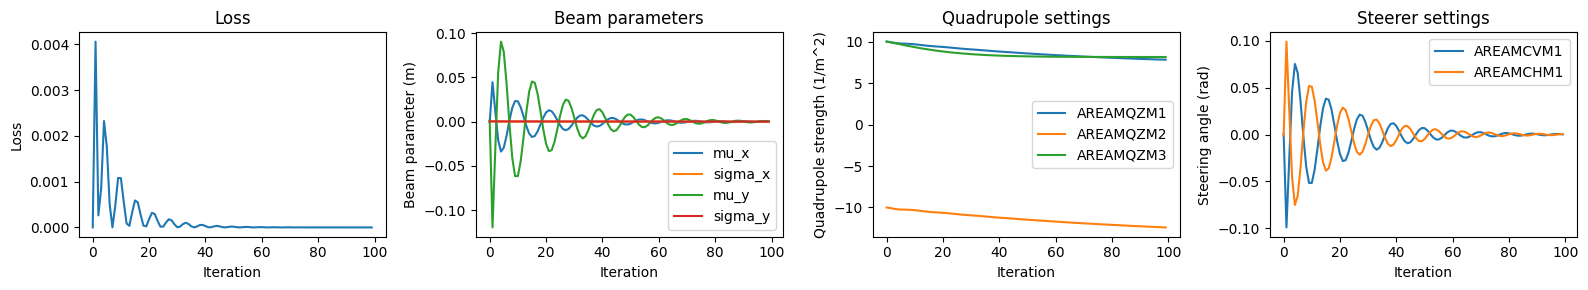

In [30]:
plt.figure(figsize=(16, 3))

plt.subplot(1, 4, 1)
plt.plot(history["loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss")

plt.subplot(1, 4, 2)
plt.plot([record[0] for record in history["beam_parameters"]], label="mu_x")
plt.plot([record[1] for record in history["beam_parameters"]], label="sigma_x")
plt.plot([record[2] for record in history["beam_parameters"]], label="mu_y")
plt.plot([record[3] for record in history["beam_parameters"]], label="sigma_y")
plt.xlabel("Iteration")
plt.ylabel("Beam parameter (m)")
plt.title("Beam parameters")
plt.legend()

plt.subplot(1, 4, 3)
plt.plot([record[0] for record in history["magnet_settings"]], label="AREAMQZM1")
plt.plot([record[1] for record in history["magnet_settings"]], label="AREAMQZM2")
plt.plot([record[3] for record in history["magnet_settings"]], label="AREAMQZM3")
plt.xlabel("Iteration")
plt.ylabel("Quadrupole strength (1/m^2)")
plt.title("Quadrupole settings")
plt.legend()

plt.subplot(1, 4, 4)
plt.plot([record[2] for record in history["magnet_settings"]], label="AREAMCVM1")
plt.plot([record[4] for record in history["magnet_settings"]], label="AREAMCHM1")
plt.xlabel("Iteration")
plt.ylabel("Steering angle (rad)")
plt.title("Steerer settings")
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
class NormalizedARESExperimentalArea(nn.Module):
    """
    Wrapper around the AREA experimental area that holds normalised versions of the
    magnet settings as its trainable parameters.
    """

    QUADRUPOLE_LIMIT = 5.0
    STEERER_LIMIT = 6.1782e-3

    def __init__(self) -> None:
        super().__init__()

        self.ares_ea = cheetah.Segment.from_ocelot(ares_ocelot.cell).subcell(
            "AREASOLA1", "AREABSCR1"
        )

        self.normalized_quadrupole_strengths = nn.Parameter(
            torch.tensor([10.0, -10.0, 10.0]) / self.QUADRUPOLE_LIMIT
        )
        self.normalized_steering_angles = nn.Parameter(
            torch.tensor([1e-3, -1e-3]) / self.STEERER_LIMIT
        )

    def forward(self, incoming_beam: cheetah.Beam):
        self.ares_ea.AREAMQZM1.k1 = (
            self.normalized_quadrupole_strengths[0] * self.QUADRUPOLE_LIMIT
        )
        self.ares_ea.AREAMQZM2.k1 = (
            self.normalized_quadrupole_strengths[1] * self.QUADRUPOLE_LIMIT
        )
        self.ares_ea.AREAMCVM1.angle = (
            self.normalized_steering_angles[0] * self.STEERER_LIMIT
        )
        self.ares_ea.AREAMQZM3.k1 = (
            self.normalized_quadrupole_strengths[2] * self.QUADRUPOLE_LIMIT
        )
        self.ares_ea.AREAMCHM1.angle = (
            self.normalized_steering_angles[1] * self.STEERER_LIMIT
        )

        return self.ares_ea.track(incoming_beam)

In [32]:
normalized_ares_ea = NormalizedARESExperimentalArea()

In [33]:
def train_normalized(num_steps: int, target_beam_parameters: torch.Tensor):
    beam_parameter_history = []
    magnet_setting_history = []
    loss_history = []

    optimizer = torch.optim.Adam(normalized_ares_ea.parameters(), lr=1e-2)

    for _ in range(num_steps):
        optimizer.zero_grad()

        outgoing_beam = normalized_ares_ea(incoming_beam)
        observed_beam_parameters = torch.stack(
            [
                outgoing_beam.mu_x,
                outgoing_beam.sigma_x,
                outgoing_beam.mu_y,
                outgoing_beam.sigma_y,
            ]
        )
        loss = F.mse_loss(
            observed_beam_parameters / 2e-3, target_beam_parameters / 2e-3
        )

        loss.backward()

        # Log magnet settings and beam parameters
        loss_history.append(loss.item())
        beam_parameter_history.append(observed_beam_parameters.detach().numpy())
        magnet_setting_history.append(
            torch.stack(
                [
                    normalized_ares_ea.ares_ea.AREAMQZM1.k1,
                    normalized_ares_ea.ares_ea.AREAMQZM2.k1,
                    normalized_ares_ea.ares_ea.AREAMCVM1.angle,
                    normalized_ares_ea.ares_ea.AREAMQZM3.k1,
                    normalized_ares_ea.ares_ea.AREAMCHM1.angle,
                ]
            )
            .detach()
            .numpy()
        )

        optimizer.step()

    history = {
        "loss": loss_history,
        "beam_parameters": beam_parameter_history,
        "magnet_settings": magnet_setting_history,
    }
    return history

In [34]:
history = train_normalized(num_steps=100, target_beam_parameters=torch.zeros(4))

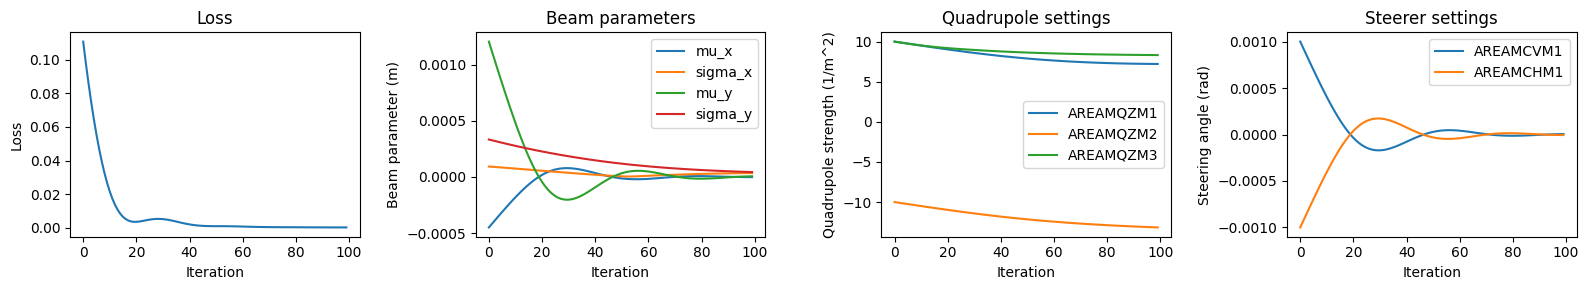

In [35]:
plt.figure(figsize=(16, 3))

plt.subplot(1, 4, 1)
plt.plot(history["loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss")

plt.subplot(1, 4, 2)
plt.plot([record[0] for record in history["beam_parameters"]], label="mu_x")
plt.plot([record[1] for record in history["beam_parameters"]], label="sigma_x")
plt.plot([record[2] for record in history["beam_parameters"]], label="mu_y")
plt.plot([record[3] for record in history["beam_parameters"]], label="sigma_y")
plt.xlabel("Iteration")
plt.ylabel("Beam parameter (m)")
plt.title("Beam parameters")
plt.legend()

plt.subplot(1, 4, 3)
plt.plot([record[0] for record in history["magnet_settings"]], label="AREAMQZM1")
plt.plot([record[1] for record in history["magnet_settings"]], label="AREAMQZM2")
plt.plot([record[3] for record in history["magnet_settings"]], label="AREAMQZM3")
plt.xlabel("Iteration")
plt.ylabel("Quadrupole strength (1/m^2)")
plt.title("Quadrupole settings")
plt.legend()

plt.subplot(1, 4, 4)
plt.plot([record[2] for record in history["magnet_settings"]], label="AREAMCVM1")
plt.plot([record[4] for record in history["magnet_settings"]], label="AREAMCHM1")
plt.xlabel("Iteration")
plt.ylabel("Steering angle (rad)")
plt.title("Steerer settings")
plt.legend()

plt.tight_layout()
plt.show()